In [34]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import math
import scipy.special as sp

In [35]:
# Device configuration
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = 'cpu'

In [36]:
# Hyper-parameters 
INPUT_SIZE = 52
HIDDEN1_SIZE = 55
HIDDEN2_SIZE = 35
HIDDEN3_SIZE = 60
OUTPUT_SIZE = 1 
EPOCHS = 6000
BATCH_SIZE = 10
LEARNING_RATE = 0.001

FILENAME_GCALREALTRAIN = 'trainGcalImag.csv'
FILENAME_GCALREALTEST = 'testGcalImag.csv'

FILENAME_COORDTRAIN_SOURCEX = 'trainsourcex.csv'
FILENAME_COORDTRAIN_SOURCEY = 'trainsourcey.csv'
FILENAME_COORDTRAIN_FIELDX = 'trainfieldx.csv'
FILENAME_COORDTRAIN_FIELDY = 'trainfieldy.csv'

FILENAME_COORDTEST_SOURCEX = 'testsourcex.csv'
FILENAME_COORDTEST_SOURCEY = 'testsourcey.csv'
FILENAME_COORDTEST_FIELDX = 'testfieldx.csv'
FILENAME_COORDTEST_FIELDY = 'testfieldy.csv'


In [37]:
#Variables
Ntrain = 20000
Ntest = 3000
trainsourcex = []
trainsourcey = []
trainfieldx = []
trainfieldy = []
testsourcex = []
testsourcey = []
testfieldx = []
testfieldy = []

trainreal = []
testreal = []

In [38]:
InFile = open(FILENAME_COORDTRAIN_SOURCEX,'r')
Line = InFile.readline()
GetData = Line.split(',')
for i in range(Ntrain):
    trainsourcex.append(eval(GetData[i]))
InFile.close()

InFile = open(FILENAME_COORDTRAIN_SOURCEY,'r')
Line = InFile.readline()
GetData = Line.split(',')
for i in range(Ntrain):
    trainsourcey.append(eval(GetData[i]))
InFile.close()

InFile = open(FILENAME_COORDTRAIN_FIELDX,'r')
Line = InFile.readline()
GetData = Line.split(',')
for i in range(Ntrain):
    trainfieldx.append(eval(GetData[i]))
InFile.close()

InFile = open(FILENAME_COORDTRAIN_FIELDY,'r')
Line = InFile.readline()
GetData = Line.split(',')
for i in range(Ntrain):
    trainfieldy.append(eval(GetData[i]))
InFile.close()

InFile = open(FILENAME_COORDTEST_SOURCEX,'r')
Line = InFile.readline()
GetData = Line.split(',')
for i in range(Ntest):
    testsourcex.append(eval(GetData[i]))
InFile.close()

InFile = open(FILENAME_COORDTEST_SOURCEY,'r')
Line = InFile.readline()
GetData = Line.split(',')
for i in range(Ntest):
    testsourcey.append(eval(GetData[i]))
InFile.close()

InFile = open(FILENAME_COORDTEST_FIELDX,'r')
Line = InFile.readline()
GetData = Line.split(',')
for i in range(Ntest):
    testfieldx.append(eval(GetData[i]))
InFile.close()

InFile = open(FILENAME_COORDTEST_FIELDY,'r')
Line = InFile.readline()
GetData = Line.split(',')
for i in range(Ntest):
    testfieldy.append(eval(GetData[i]))
InFile.close()

InFile = open(FILENAME_GCALREALTRAIN,'r')
Line = InFile.readline()
GetData = Line.split(',')
for i in range(Ntrain):
    trainreal.append(eval(GetData[i]))
InFile.close()

InFile = open(FILENAME_GCALREALTEST,'r')
Line = InFile.readline()
GetData = Line.split(',')
for i in range(Ntest):
    testreal.append(eval(GetData[i]))
InFile.close()

In [39]:


ErealArray = np.array(trainreal)
SourceCoorxArray = np.array(trainsourcex)
SourceCooryArray = np.array(trainsourcey)
FieldCoorxArray = np.array(trainfieldx)
FieldCooryArray = np.array(trainfieldy)

SourceCoorxArray = SourceCoorxArray - FieldCoorxArray
SourceCooryArray = SourceCooryArray - FieldCooryArray

ErealMax = np.max(ErealArray)
ErealMin = np.min(ErealArray)
SourceCoorxMax = np.max(SourceCoorxArray)
SourceCooryMax = np.max(SourceCooryArray)
SourceCoorxMin = np.min(SourceCoorxArray)
SourceCooryMin = np.min(SourceCooryArray)

ErealTestArray = np.array(testreal)
SourceCoorxTestArray = np.array(testsourcex)
SourceCooryTestArray = np.array(testsourcey)
FieldCoorxTestArray = np.array(testfieldx)
FieldCooryTestArray = np.array(testfieldy)

SourceCoorxTestArray = SourceCoorxTestArray - FieldCoorxTestArray
SourceCooryTestArray = SourceCooryTestArray - FieldCooryTestArray

In [40]:

ErealArray = (ErealArray - ErealMin)/(ErealMax - ErealMin)
SourceCoorxArray = (SourceCoorxArray - SourceCoorxMin)/(SourceCoorxMax - SourceCoorxMin)
SourceCooryArray = (SourceCooryArray - SourceCooryMin)/(SourceCooryMax - SourceCooryMin)
ErealTestArray = (ErealTestArray - ErealMin)/(ErealMax - ErealMin)
SourceCoorxTestArray = (SourceCoorxTestArray - SourceCoorxMin)/(SourceCoorxMax - SourceCoorxMin)
SourceCooryTestArray = (SourceCooryTestArray - SourceCooryMin)/(SourceCooryMax - SourceCooryMin)

In [41]:


SourceCoorxTensor = torch.unsqueeze(torch.FloatTensor(SourceCoorxArray),dim = 1)
SourceCooryTensor = torch.unsqueeze(torch.FloatTensor(SourceCooryArray),dim = 1)
ErealTensor = torch.unsqueeze(torch.FloatTensor(ErealArray),dim = 1)
SourceCoorxTestTensor = torch.unsqueeze(torch.FloatTensor(SourceCoorxTestArray),dim = 1)
SourceCooryTestTensor = torch.unsqueeze(torch.FloatTensor(SourceCooryTestArray),dim = 1)
ErealTestTensor = torch.unsqueeze(torch.FloatTensor(ErealTestArray),dim = 1)

In [42]:


def MakeFeatures(x):
    a = torch.cat([torch.sin(x * i) for i in range(1,14)] , 1)
    b = torch.cat([torch.cos(x * i) for i in range(1,14)] , 1)
    c = torch.cat((a,b),1)
    return c



In [43]:


SourceCoorxTensor = MakeFeatures(SourceCoorxTensor)
SourceCooryTensor = MakeFeatures(SourceCooryTensor)

SourceCoorxTestTensor = MakeFeatures(SourceCoorxTestTensor)
SourceCooryTestTensor = MakeFeatures(SourceCooryTestTensor)


Inputs = torch.cat((SourceCoorxTensor,SourceCooryTensor),1)
InputsTest  = torch.cat((SourceCoorxTestTensor,SourceCooryTestTensor),1)
print(Inputs.size())
print(ErealTensor.size())
print(InputsTest.size())
print(ErealTestTensor.size())


torch.Size([20000, 52])
torch.Size([20000, 1])
torch.Size([3000, 52])
torch.Size([3000, 1])


In [44]:
# Fully connected neural network 
class NeuralNet(nn.Module):
    def __init__(self, InputSize, Hidden1Size, Hidden2Size,Hidden3Size,OutputSize):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(InputSize, Hidden1Size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(Hidden1Size, Hidden2Size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(Hidden2Size,Hidden3Size)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(Hidden3Size,OutputSize)

    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.relu3(out)
        out = self.fc4(out)

        return out
    
Model = NeuralNet(INPUT_SIZE, HIDDEN1_SIZE,HIDDEN2_SIZE, HIDDEN3_SIZE,OUTPUT_SIZE).to(device)     # define the network

# Loss and optimizer
Criterion = nn.MSELoss()
Optimizer = torch.optim.Adam(Model.parameters(), lr=LEARNING_RATE) 

In [45]:
# Train the model
for epoch in range(EPOCHS):
    # Forward pass
    Outputs = Model(Inputs)
    Loss = Criterion(Outputs, ErealTensor)
    
    # Backward and optimize
    Optimizer.zero_grad()
    Loss.backward()
    Optimizer.step()
    
    if (epoch+1) % 500 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, EPOCHS, Loss.item()))

Epoch [500/6000], Loss: 0.0064
Epoch [1000/6000], Loss: 0.0063
Epoch [1500/6000], Loss: 0.0052
Epoch [2000/6000], Loss: 0.0035
Epoch [2500/6000], Loss: 0.0027
Epoch [3000/6000], Loss: 0.0018
Epoch [3500/6000], Loss: 0.0016
Epoch [4000/6000], Loss: 0.0017
Epoch [4500/6000], Loss: 0.0014
Epoch [5000/6000], Loss: 0.0014
Epoch [5500/6000], Loss: 0.0015
Epoch [6000/6000], Loss: 0.0013


In [46]:
torch.save({'state_dict': Model.state_dict()}, 'checkpoint.pth.tar')

In [47]:
Model = NeuralNet(INPUT_SIZE, HIDDEN1_SIZE,HIDDEN2_SIZE, HIDDEN3_SIZE,OUTPUT_SIZE).to(device)
checkpoint = torch.load('checkpoint.pth.tar')
Model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [48]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    Predicted = Model(InputsTest)
    LossPredicted = Criterion(Predicted,ErealTestTensor)
print('The test loss is:',LossPredicted)

The test loss is: tensor(0.0012)


In [49]:
FILENAME_COORDPLOT_FIELDX = 'plotfieldx.csv'
FILENAME_COORDPLOT_FIELDY = 'plotfieldy.csv'

N = 5724

plotfieldx = []
plotfieldy = []

InFile = open(FILENAME_COORDPLOT_FIELDX,'r')
Line = InFile.readline()
GetData = Line.split(',')
for i in range(N):
    plotfieldx.append(eval(GetData[i]))
InFile.close()

InFile = open(FILENAME_COORDPLOT_FIELDY,'r')
Line = InFile.readline()
GetData = Line.split(',')
for i in range(N):
    plotfieldy.append(eval(GetData[i]))
InFile.close()
FieldCoorxPlotArray = np.array(plotfieldx)
FieldCooryPlotArray = np.array(plotfieldy)

In [50]:
FILENAME_PLOT = 'plottestimag.csv'
N = 5724
PlotTestTrue = []
InFile = open(FILENAME_PLOT,'r')
Line = InFile.readline()
GetData = Line.split(',')
for i in range(N):
    PlotTestTrue.append(eval(GetData[i]))
InFile.close()
PlotTestTrueArray = np.array(PlotTestTrue)   
PlotTestTrueArray = (PlotTestTrueArray - ErealMin)/(ErealMax - ErealMin)
PlotTestTrueTensor = torch.unsqueeze(torch.FloatTensor(PlotTestTrueArray),dim = 1)

In [51]:
FILENAME_POSITION = 'Position.csv'
FILENAME_GLONUMBAC = 'GlobalNumBackground.csv'
FILENAME_NonBac = 'GlobalNumNonBackground.csv'
Positionx = []
Positiony = []
InFile = open(FILENAME_POSITION,'r')
Line = InFile.readline()
GetData = Line.split(',')
for i in range(6400):
    Positionx.append(eval(GetData[i]))
Line = InFile.readline()
GetData = Line.split(',')
for i in range(6400):
    Positiony.append(eval(GetData[i]))
InFile.close()

Positionxarray = np.array(Positionx)
Positionyarray = np.array(Positiony)

isource = 5200
positionsourcex = FieldCoorxPlotArray[isource-1]
positionsourcey = FieldCooryPlotArray[isource-1]
SourceCoorxPlotArray = np.ones(5724)*positionsourcex
SourceCooryPlotArray = np.ones(5724)*positionsourcey
print(SourceCoorxPlotArray)  
print(SourceCooryPlotArray)  

print(FieldCoorxPlotArray)
print(FieldCooryPlotArray)


SourceCoorxPlotArray = SourceCoorxPlotArray - FieldCoorxPlotArray
SourceCooryPlotArray = SourceCooryPlotArray - FieldCooryPlotArray



[2.5125 2.5125 2.5125 ... 2.5125 2.5125 2.5125]
[0.3375 0.3375 0.3375 ... 0.3375 0.3375 0.3375]
[-2.9625 -2.9625 -2.9625 ...  2.9625  2.9625  2.9625]
[ 2.9625  2.8875  2.8125 ... -2.8125 -2.8875 -2.9625]


In [52]:

SourceCoorxPlotArray = (SourceCoorxPlotArray - SourceCoorxMin)/(SourceCoorxMax - SourceCoorxMin)
SourceCooryPlotArray = (SourceCooryPlotArray - SourceCooryMin)/(SourceCooryMax - SourceCooryMin)
SourceCoorxPlotTensor = torch.unsqueeze(torch.FloatTensor(SourceCoorxPlotArray),dim = 1)
SourceCooryPlotTensor = torch.unsqueeze(torch.FloatTensor(SourceCooryPlotArray),dim = 1)
SourceCoorxPlotTensor = MakeFeatures(SourceCoorxPlotTensor)
SourceCooryPlotTensor = MakeFeatures(SourceCooryPlotTensor)
InputsPlot  = torch.cat((SourceCoorxPlotTensor,SourceCooryPlotTensor),1)


with torch.no_grad():
    PredictedPlot = Model(InputsPlot)
    LossPredictedPlot = Criterion(PredictedPlot,PlotTestTrueTensor)
print('The test loss is:',LossPredictedPlot)


ErealPredictionTensor = PredictedPlot
ErealPredictionArray = np.array(ErealPredictionTensor)
ErealPredictionArray = ErealPredictionArray[...,0]


GloNumBac = []
InFile = open(FILENAME_GLONUMBAC,'r')
Line = InFile.readline()
GetData = Line.split(',')
for i in range(676):
    GloNumBac.append(eval(GetData[i]))
InFile.close()

GloNumNonBac = []
InFile = open(FILENAME_NonBac,'r')
Line = InFile.readline()
GetData = Line.split(',')
for i in range(5724):
    GloNumNonBac.append(eval(GetData[i]))
InFile.close()
GloNumNonBacarray = np.array(GloNumNonBac)




EPlot = np.zeros(6400)
EPlotPred = np.zeros(6400)
for i in range(5724):
    EPlot[GloNumNonBacarray[i]-1]=PlotTestTrueArray[i]
    EPlotPred[GloNumNonBacarray[i]-1]=ErealPredictionArray[i]

Positionxarray = np.array(Positionx)
Positionyarray = np.array(Positiony)
X = Positionxarray.reshape((80,80))
Y = Positionyarray.reshape((80,80))
EPlotPlot = EPlot.reshape((80,80))
EPlotPlotPred = EPlotPred.reshape((80,80))
print(EPlotPlot)





The test loss is: tensor(0.0013)
[[0.65554149 0.63777218 0.62043807 ... 0.68679685 0.67798662 0.66932926]
 [0.62235571 0.60839613 0.59725201 ... 0.69470137 0.69018358 0.68471487]
 [0.60180353 0.59569321 0.59374471 ... 0.69056108 0.69129168 0.69063428]
 ...
 [0.71879243 0.75852962 0.76047453 ... 0.71333376 0.74780749 0.74777161]
 [0.71187185 0.7547618  0.76158693 ... 0.7171389  0.74852517 0.74521667]
 [0.70385753 0.75037678 0.76305818 ... 0.72212749 0.74972369 0.74244643]]


<ipython-input-53-5f1bf9c647c6>:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(X,Y,chazhi,cmap=clrmap,vmax=0.5,vmin=-0.5)


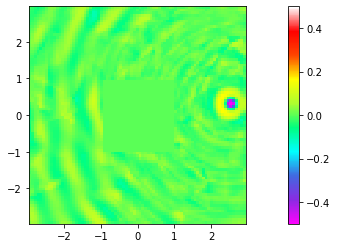

In [53]:
colors=["magenta","blueviolet","royalblue","aqua","springgreen",
"greenyellow","yellow","orangered","red","white"]
clrmap=mcolors.LinearSegmentedColormap.from_list("mycmap",colors)

# plt.pcolor(X,Y,EPlotPlot,cmap=clrmap)
# plt.pcolor(X,Y,EPlotPlotPred,cmap=clrmap)
chazhi = EPlotPlot-EPlotPlotPred
plt.pcolor(X,Y,chazhi,cmap=clrmap,vmax=0.5,vmin=-0.5)
plt.colorbar()
# # #Set equal scaling (i.e., make circles circular)
# # #by changing dimensions of the plot box.
plt.axis('scaled')
plt.show()

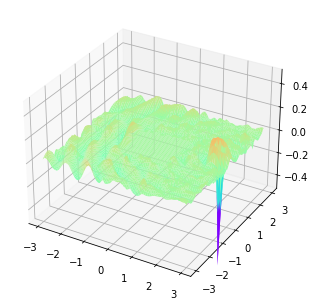

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

chazhi = EPlotPlot-EPlotPlotPred
fig = plt.figure()
ax = Axes3D(fig)
ax.set_zlim3d(zmax=0.5)
ax.set_zlim3d(zmin=-0.5)
ax.plot_surface(X, Y,chazhi, rstride=1, cstride=1, vmax = 0.4,cmap=plt.get_cmap('rainbow'))

<ipython-input-55-0cbc83a7f5e1>:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(X,Y,EPlotPlotPred,cmap=clrmap,vmax=1,vmin=0)


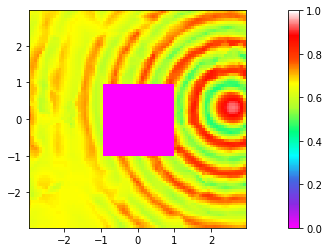

In [55]:
colors=["magenta","blueviolet","royalblue","aqua","springgreen",
"greenyellow","yellow","orangered","red","white"]
clrmap=mcolors.LinearSegmentedColormap.from_list("mycmap",colors)

# plt.pcolor(X,Y,EPlotPlot,cmap=clrmap)
# plt.pcolor(X,Y,EPlotPlotPred,cmap=clrmap)

plt.pcolor(X,Y,EPlotPlotPred,cmap=clrmap,vmax=1,vmin=0)
plt.colorbar()
# # #Set equal scaling (i.e., make circles circular)
# # #by changing dimensions of the plot box.
plt.axis('scaled')
plt.show()

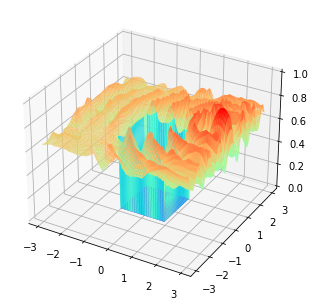

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.set_zlim3d(zmax=1)
ax.set_zlim3d(zmin=0)
ax.plot_surface(X, Y, EPlotPlotPred, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'))

<ipython-input-57-13af996c2d6c>:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(X,Y,EPlotPlot,cmap=clrmap,vmax=1,vmin=0)


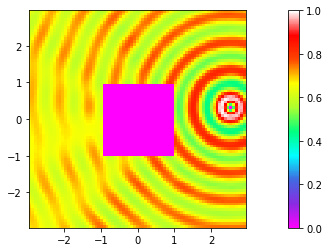

In [57]:
colors=["magenta","blueviolet","royalblue","aqua","springgreen",
"greenyellow","yellow","orangered","red","white"]
clrmap=mcolors.LinearSegmentedColormap.from_list("mycmap",colors)

# plt.pcolor(X,Y,EPlotPlot,cmap=clrmap)
# plt.pcolor(X,Y,EPlotPlotPred,cmap=clrmap)

plt.pcolor(X,Y,EPlotPlot,cmap=clrmap,vmax=1,vmin=0)
plt.colorbar()
# # #Set equal scaling (i.e., make circles circular)
# # #by changing dimensions of the plot box.
plt.axis('scaled')
plt.show()

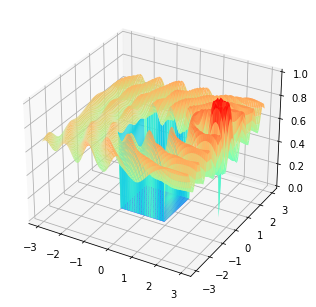

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()

ax = Axes3D(fig)
ax.set_zlim3d(zmax=1)
ax.set_zlim3d(zmin=0)
ax.plot_surface(X, Y,EPlotPlot, rstride=1, cstride=1,cmap=plt.get_cmap('rainbow'))